**Predicting Loan Default**

This data is from L&T Financial Service company.




In [1]:

# General Libraries
import pandas as pd
import numpy as np
from itertools import product
import warnings
from tqdm import tqdm

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, modelling & evaluation
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,  accuracy_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import describe,skew

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
 train_data.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...  \
0               45                1441      01-01-84        Salaried  ...   
1               45                1502      31-07-85   Self employed  ...   
2               45                1497      24-08-85   Self employed  ...   
3               45                1501      30-12-93   Self employed  ...   
4               45                1495      09-12-77   Self employed  ...   

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                     0                     0                   0   
1                     0                     0                1991   
2                     0                     0                   0   
3                     0                     0                  31   
4                     0                     0                   0   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

In [4]:
train_data.shape

(233154, 41)

In [5]:
train_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [6]:
train_data.isnull().sum() #missing values only in employment type

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [7]:
#finding unique data
train_data.apply(lambda x: len(x.unique()))

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [8]:
train_data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [9]:
print('Percentage of missing values is {0}%'.format(round(100*train_data['Employment.Type'].isnull().sum()/len(train_data),3)))

Percentage of missing values is 3.286%


In [10]:
#Replacing null values in Employment.Type to 'unknown'
train_data.fillna('unknown', inplace=True)
train_data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
unknown            7661
Name: Employment.Type, dtype: int64

In [11]:
train_data.isnull().sum() #Great!, no missing values

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [12]:
#opening the description of file and reading it
file= open("data_dictionary.csv", "r")
print(file.read())

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,
1,loan_default,Payment default in the first EMI on due date,
2,disbursed_amount,Amount of Loan disbursed,
3,asset_cost,Cost of the Asset,
4,ltv,Loan to Value of the asset,
5,branch_id,Branch where the loan was disbursed,
6,supplier_id,Vehicle Dealer where the loan was disbursed,
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",
8,Current_pincode,Current pincode of the customer,
9,Date.of.Birth,Date of birth of the customer,
10,Employment.Type,Employment Type of the customer (Salaried/Self Employed),
11,DisbursalDate,Date of disbursement,
12,State_ID,State of disbursement,
13,Employee_code_ID,Employee of the organization who logged the disbursement,
14,MobileNo_Avl_Flag,if Mobile no. was shared by the customer then flagged as 1,
15,Aadhar_flag,if aadhar was shared by the customer then flagged as 1,
16,PAN_flag,if pan was shared by the customer then flagged as 1,
17,VoterID_flag,if voter  was shared

In [13]:
train_data.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

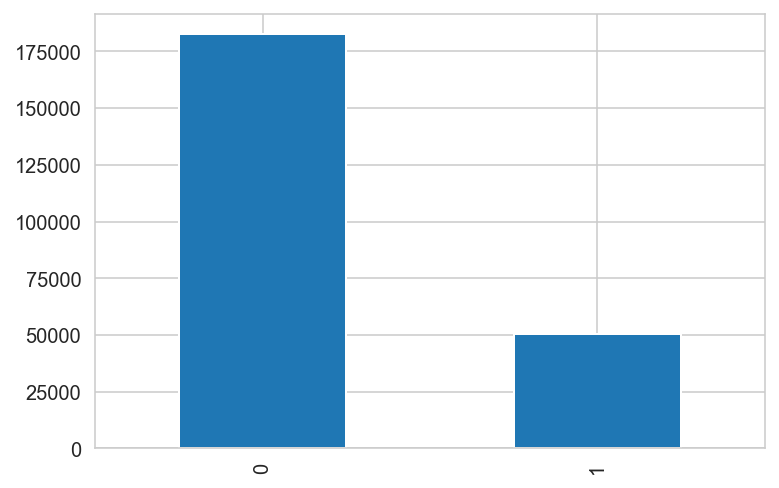

In [14]:
train_data.loan_default.value_counts().plot(kind = 'bar')

In [15]:
#Fraction of loan default
fraud_frac = train_data.loan_default.value_counts().min() / train_data.shape[0]
print("Fraction of loan default: {}".format("%.3f" % fraud_frac))

Fraction of loan default: 0.217


In [16]:
#Percentage way of representing loan default 
print('Percentage of loan default is {0}%'.format(round(100*train_data.loan_default.value_counts().min()/len(train_data), 3)))

Percentage of loan default is 21.707%


In [17]:
train_data.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             3
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [18]:
print(train_data['manufacturer_id'].unique())

[ 45  86  48  51 120  49 145  67 153 156 152]


In [19]:
train_data.dtypes.value_counts()

int64      34
object      6
float64     1
dtype: int64

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [21]:
print(train_data['PERFORM_CNS.SCORE.DESCRIPTION'].unique())

['No Bureau History Available' 'I-Medium Risk' 'L-Very High Risk'
 'A-Very Low Risk' 'Not Scored: Not Enough Info available on the customer'
 'D-Very Low Risk' 'M-Very High Risk' 'B-Very Low Risk' 'C-Very Low Risk'
 'E-Low Risk' 'H-Medium Risk' 'F-Low Risk' 'K-High Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: No Updates available in last 36 months' 'G-Low Risk'
 'J-High Risk' 'Not Scored: Only a Guarantor'
 'Not Scored: More than 50 active Accounts found']


In [22]:
#converting categorical features into numerical features
# #score_description = {'No Bureau History Available': -1,
#                      'Not Scored: Not Enough Info available on the customer'
#                      'Not Scored: No Activity seen on the customer (Inactive)':-1,
#                      'Not Scored: Sufficient History Not Available':-1,
#                      'Not Scored: No Updates available in last 36 months': -1,
#                      'Not Scored: Only a Guarantor': -1,
#                      'Not Scored: More than 50 active Accounts found': -1,
#                      'M-Very High Risk': 0,
#                      'L-Very High Risk': 1,
#                      'K-High Risk': 2,
#                      'J-High Risk':3,
#                      'I-Medium Risk':4,
#                      'H-Medium Risk':5,
#                      'G-Low Risk': 6,
#                      'F-Low Risk':7,
#                      'E-Low Risk': 8,
#                      'D-Very Low Risk':9,
#                      'C-Very Low Risk': 10, 
#                      'B-Very Low Risk':11,
#                      'A-Very Low Risk':12 
# }



#train_data['PERFORM_CNS.SCORE.DESCRIPTION'] = train_data.apply(i.value() )

train_data['PERFORM_CNS.SCORE.DESCRIPTION'] = train_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'No Bureau History Available': 0,'Not Scored: Not Enough Info available on the customer':0,'Not Scored: No Activity seen on the customer (Inactive)':0, 'Not Scored: Sufficient History Not Available':0,'Not Scored: No Updates available in last 36 months': 0,'Not Scored: Only a Guarantor': 0,'Not Scored: More than 50 active Accounts found': 0,'M-Very High Risk': 5,'L-Very High Risk': 5,'K-High Risk': 4,'J-High Risk':4,'I-Medium Risk':3,'H-Medium Risk':3,'G-Low Risk': 2,'F-Low Risk':2,'E-Low Risk': 2,'D-Very Low Risk':1,'C-Very Low Risk': 1, 'B-Very Low Risk':1,'A-Very Low Risk':1 })


 

In [23]:
train_data['PERFORM_CNS.SCORE.DESCRIPTION']

0         0
1         3
2         0
3         5
4         0
         ..
233149    1
233150    1
233151    0
233152    0
233153    0
Name: PERFORM_CNS.SCORE.DESCRIPTION, Length: 233154, dtype: int64

In [24]:
#Renaming the column to make it more clear 
train_data.rename(columns={'PERFORM_CNS.SCORE.DESCRIPTION': 'Bureau_description'}, inplace=True)

In [25]:
print (train_data['Employment.Type'].unique())

['Salaried' 'Self employed' 'unknown']


In [26]:
# Setting up time marker

d_marker= '08-11-19'
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d-%m-%y")
    d2 = datetime.strptime(d2, "%d-%m-%y")
    return abs((d2 - d1).days)

In [27]:
import datetime
from datetime import datetime
# age as on 1-1-2019 (in yrs)
train_data['Date.of.Birth'] = train_data['Date.of.Birth'].apply(lambda x:  days_between(str(x),d_marker)/365)
# Calculating time (in yrs) after disbursal
train_data['DisbursalDate']= train_data['DisbursalDate'].apply(lambda x:  days_between(str(x),d_marker)/365)


In [28]:
train_data['Date.of.Birth'];

In [29]:
train_data['DisbursalDate'];

In [30]:
train_data.dtypes #AVG Acc age and credit history length is still in 'object'

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                          float64
Employment.Type                         object
DisbursalDate                          float64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
Bureau_description                       int64
PRI.NO.OF.ACC

In [31]:
import re
train_data['average_act_age_in_months'] = train_data['AVERAGE.ACCT.AGE'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))
train_data['credit_history_length_in_months'] = train_data['CREDIT.HISTORY.LENGTH'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))
   

In [32]:
train_data['average_act_age_in_months']

0          0
1         23
2          0
3          8
4          0
          ..
233149    21
233150     6
233151     0
233152     0
233153     0
Name: average_act_age_in_months, Length: 233154, dtype: int64

In [33]:
train_data.drop(columns=['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], inplace=True)

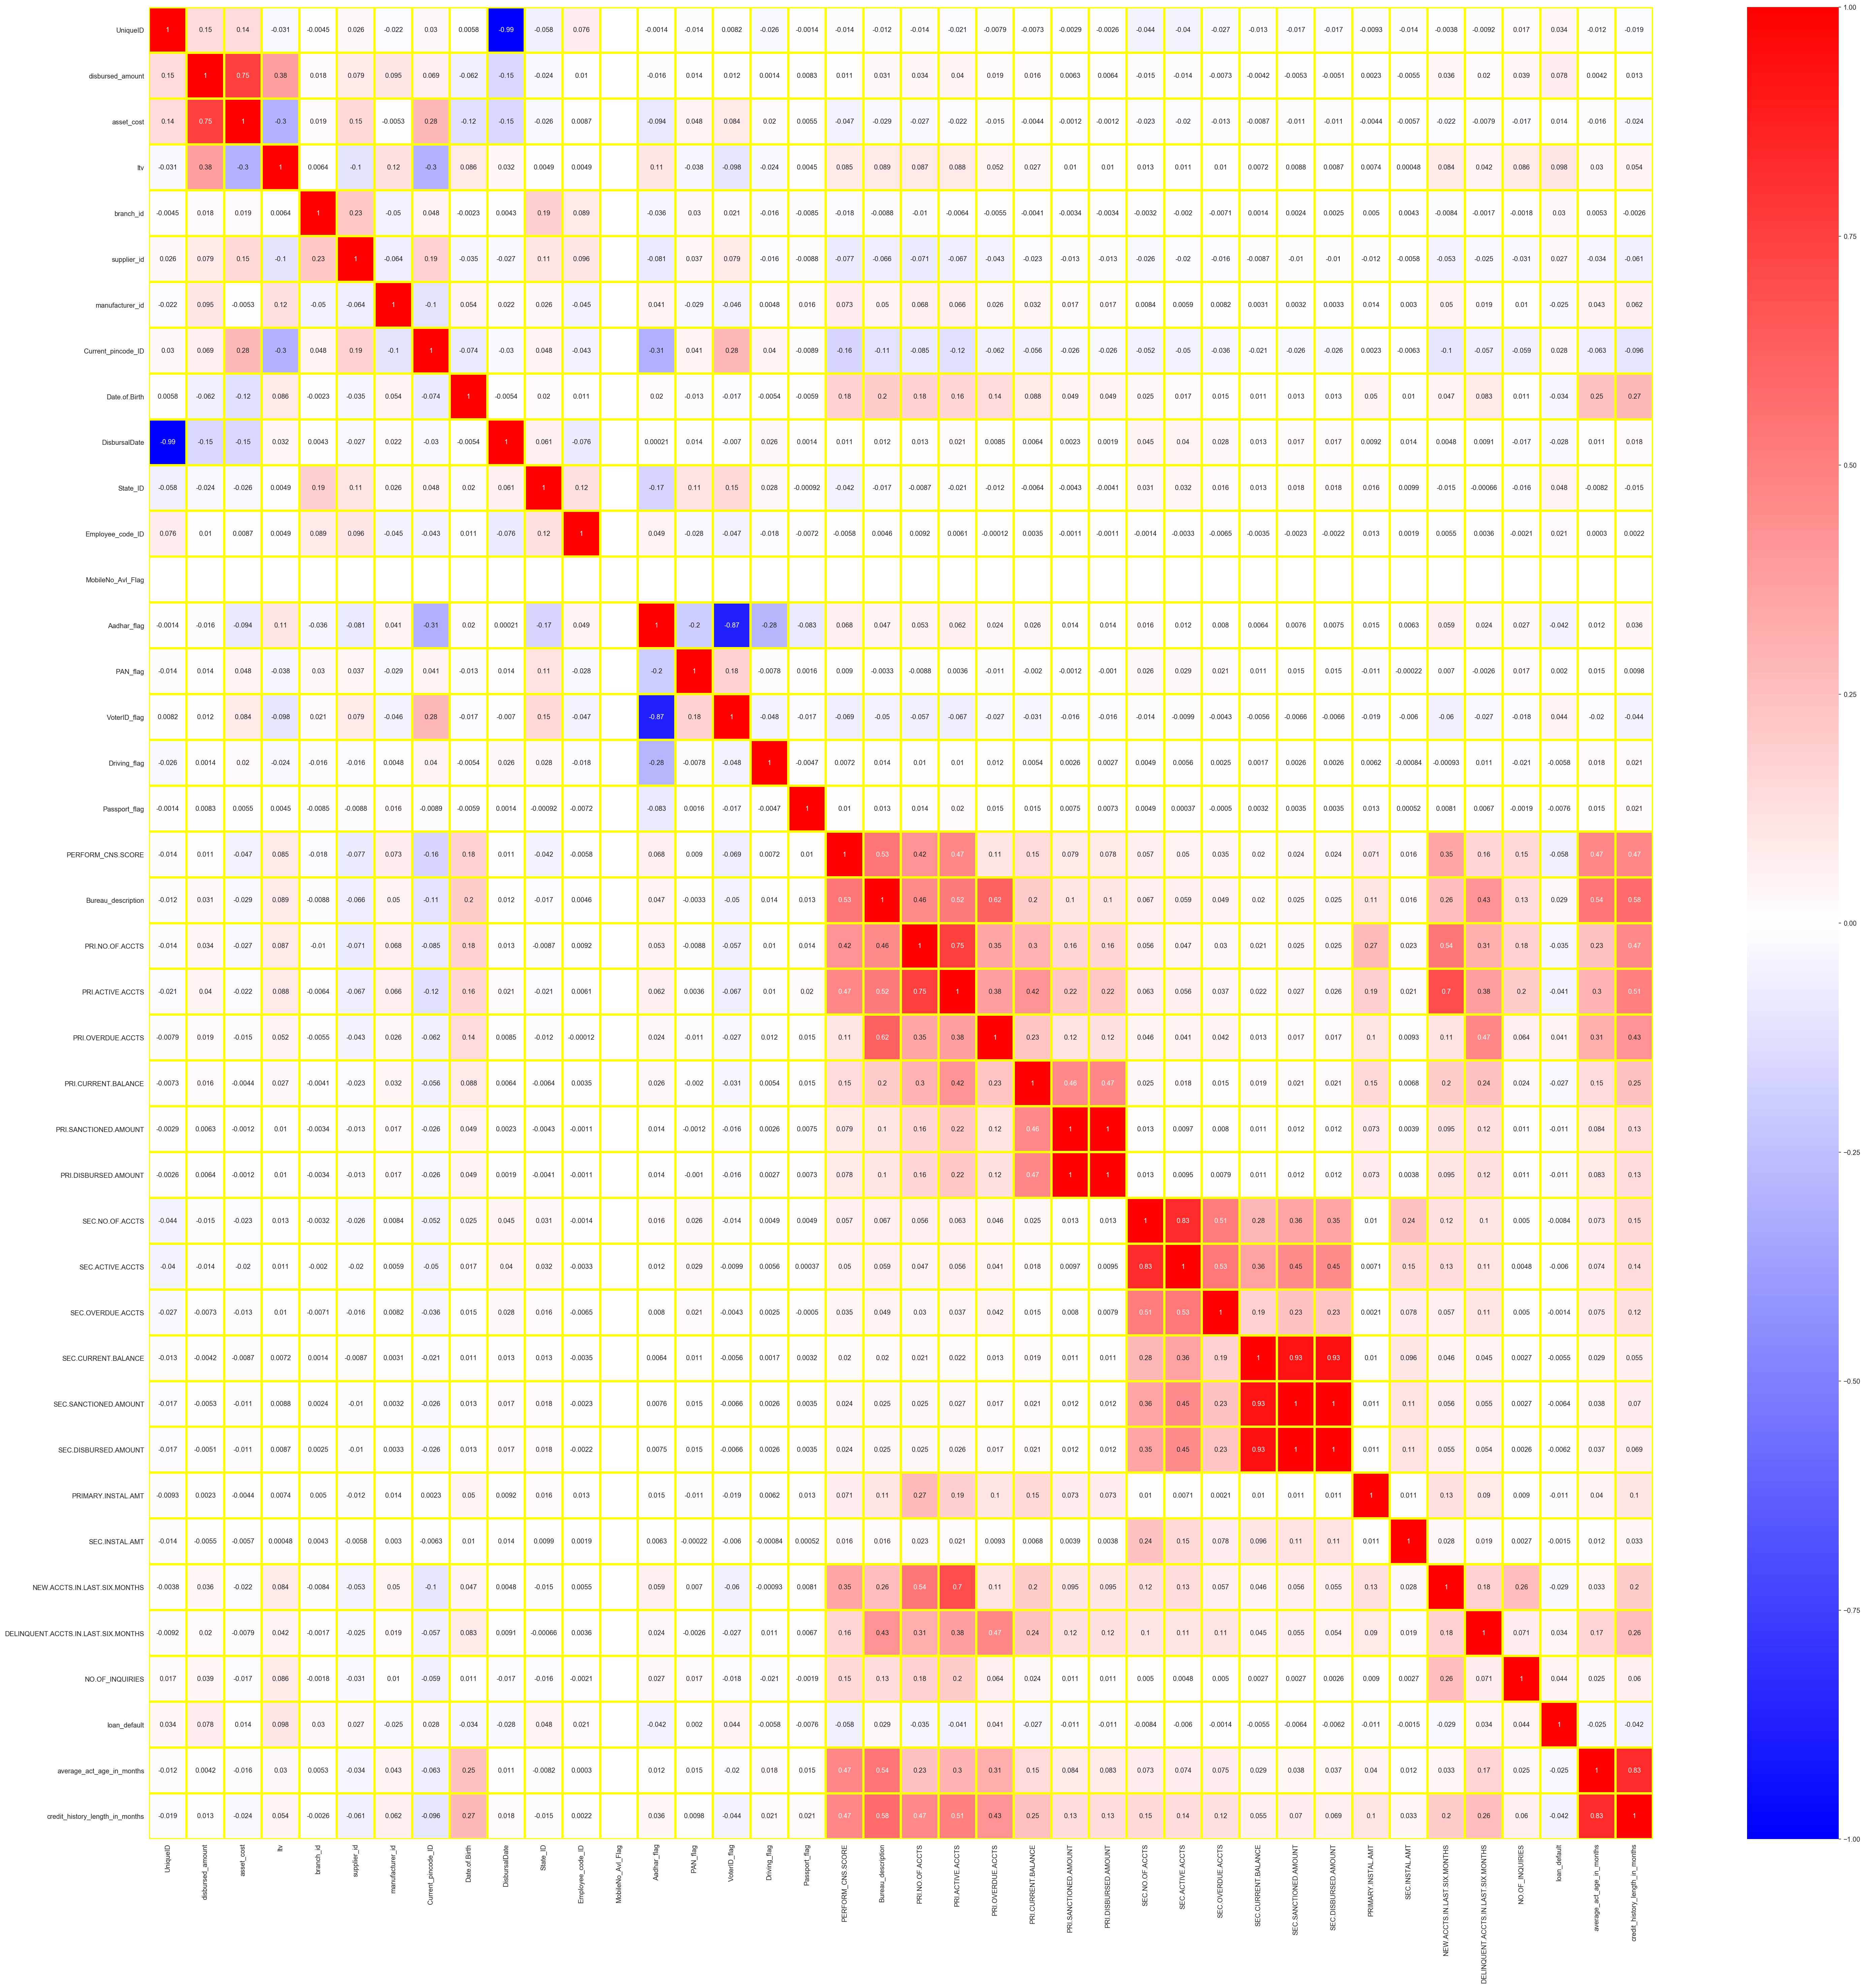

In [34]:
#to find correlation
plt.figure(figsize=(50,50))
sns.heatmap(train_data.corr(), annot=True, linewidths=3, linecolor='yellow', vmin= -1, vmax=1, cmap='bwr')
#not so clear redrawn

In [35]:
train_data.drop(columns=['MobileNo_Avl_Flag'], inplace = True)

In [36]:
train_data_corr = train_data.corr()


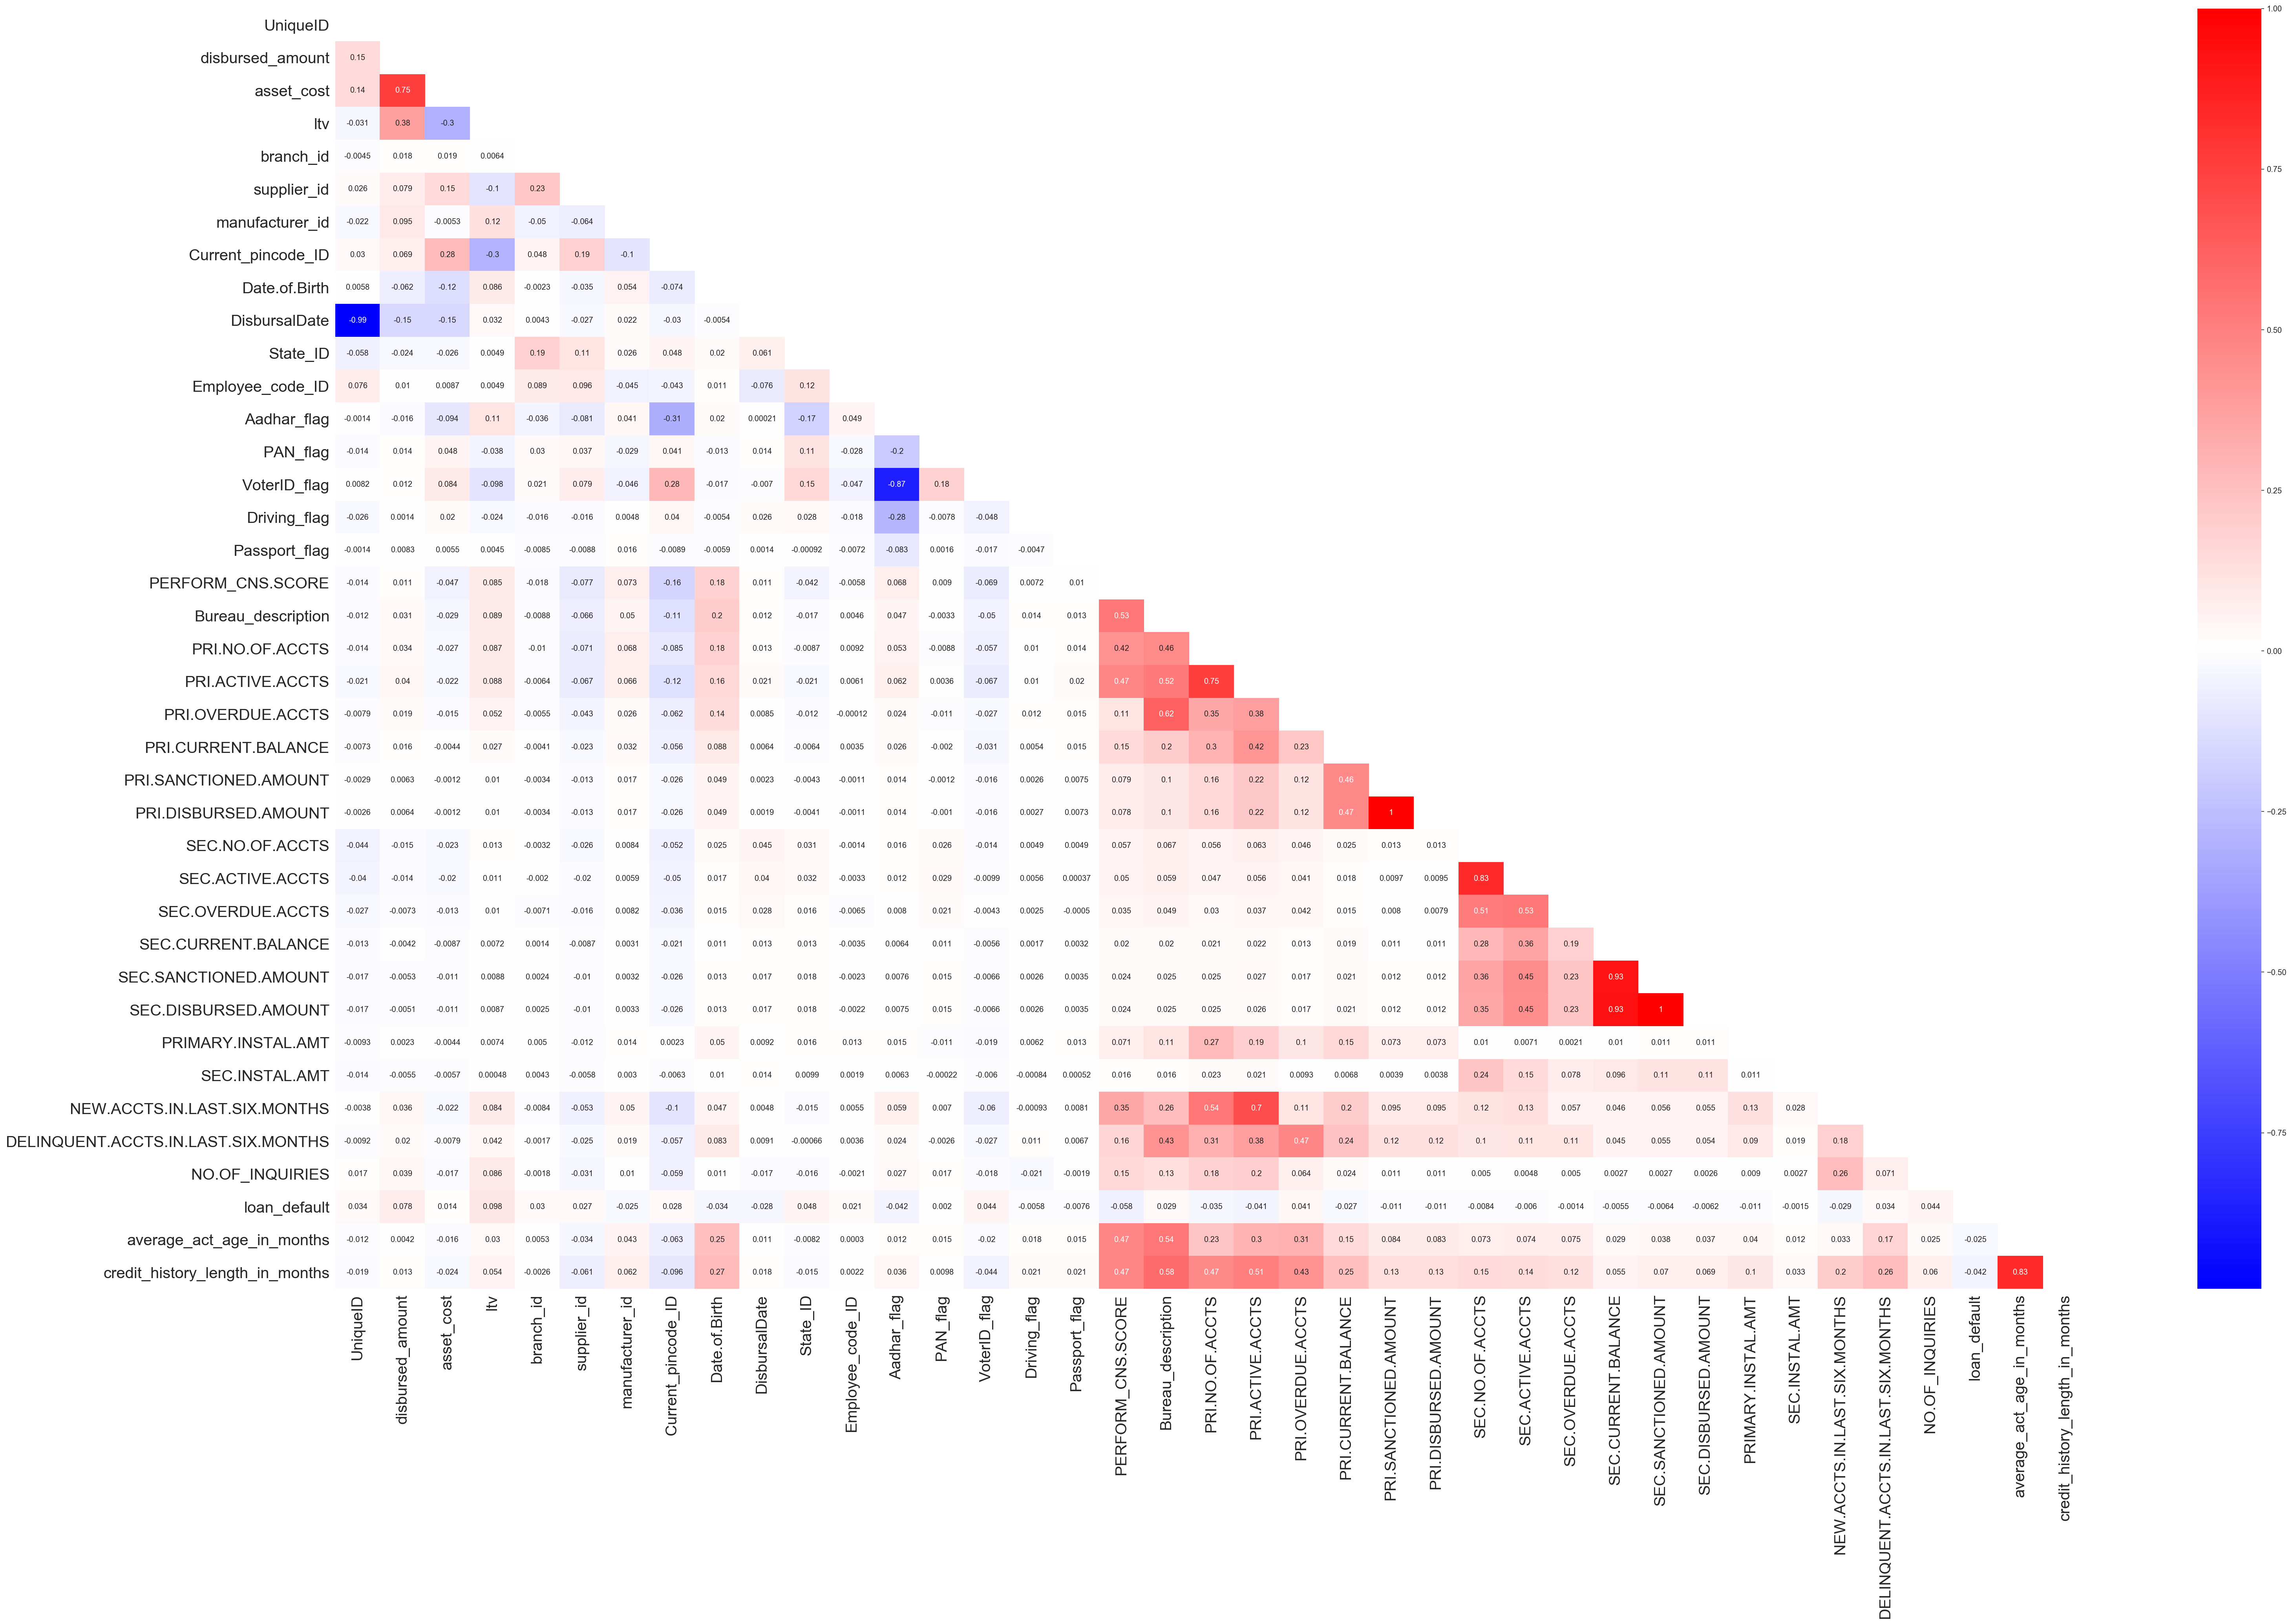

In [37]:
#plot correlation

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(50,30))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(train_data_corr, mask=mask, ax=ax, annot= True, cmap='bwr')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

**Data Visualisation**

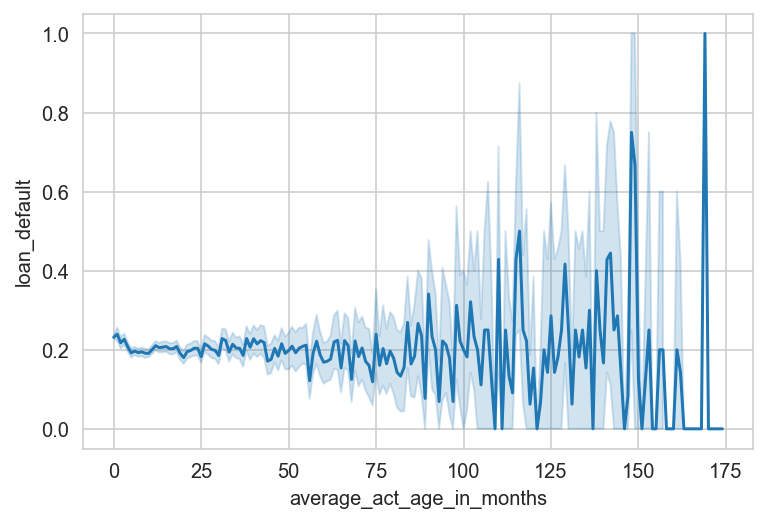

In [38]:
import seaborn as sns
df = train_data[train_data['average_act_age_in_months']<175]
sns.lineplot(x=df['average_act_age_in_months'],y=df['loan_default'])

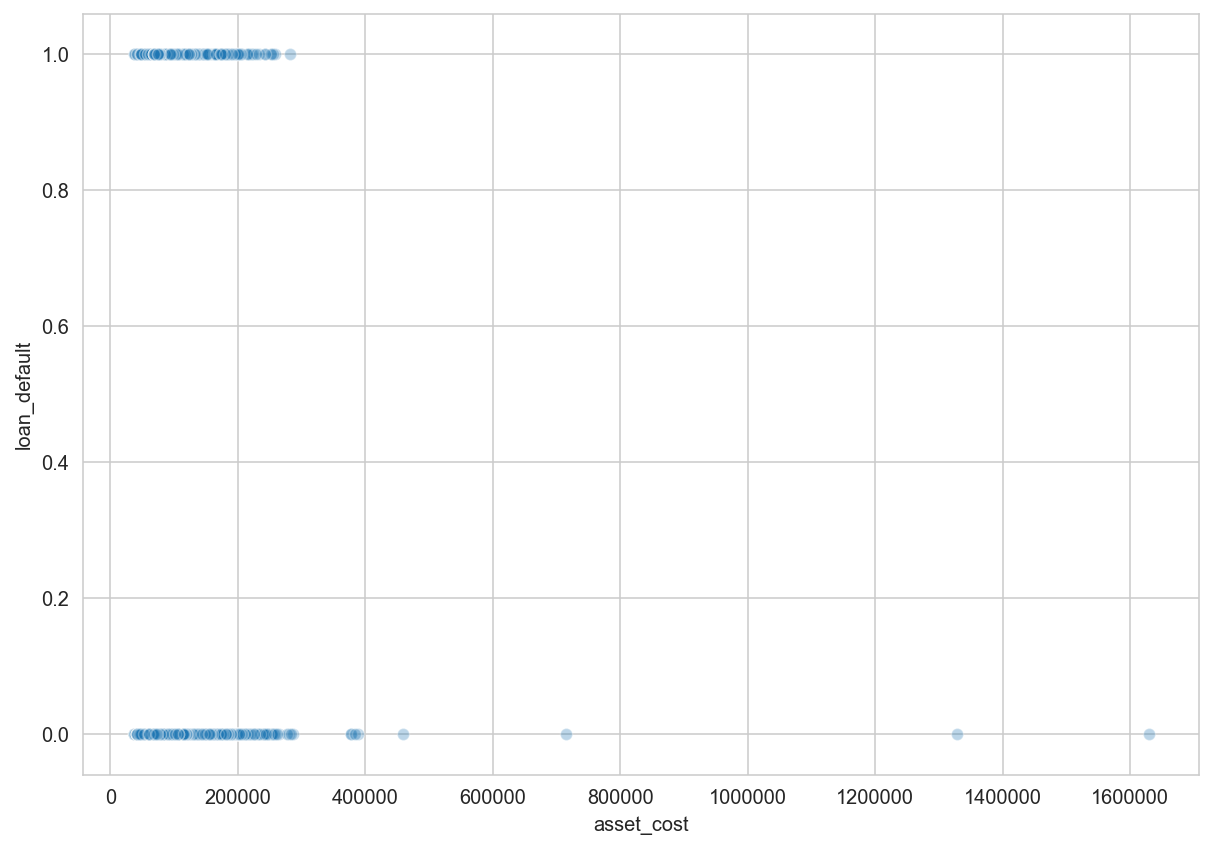

In [39]:
ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='asset_cost', y='loan_default', data=train_data, alpha = 0.3)

In [40]:
#pip install plotly_express

In [41]:
#pip install bubbly

In [42]:
# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px

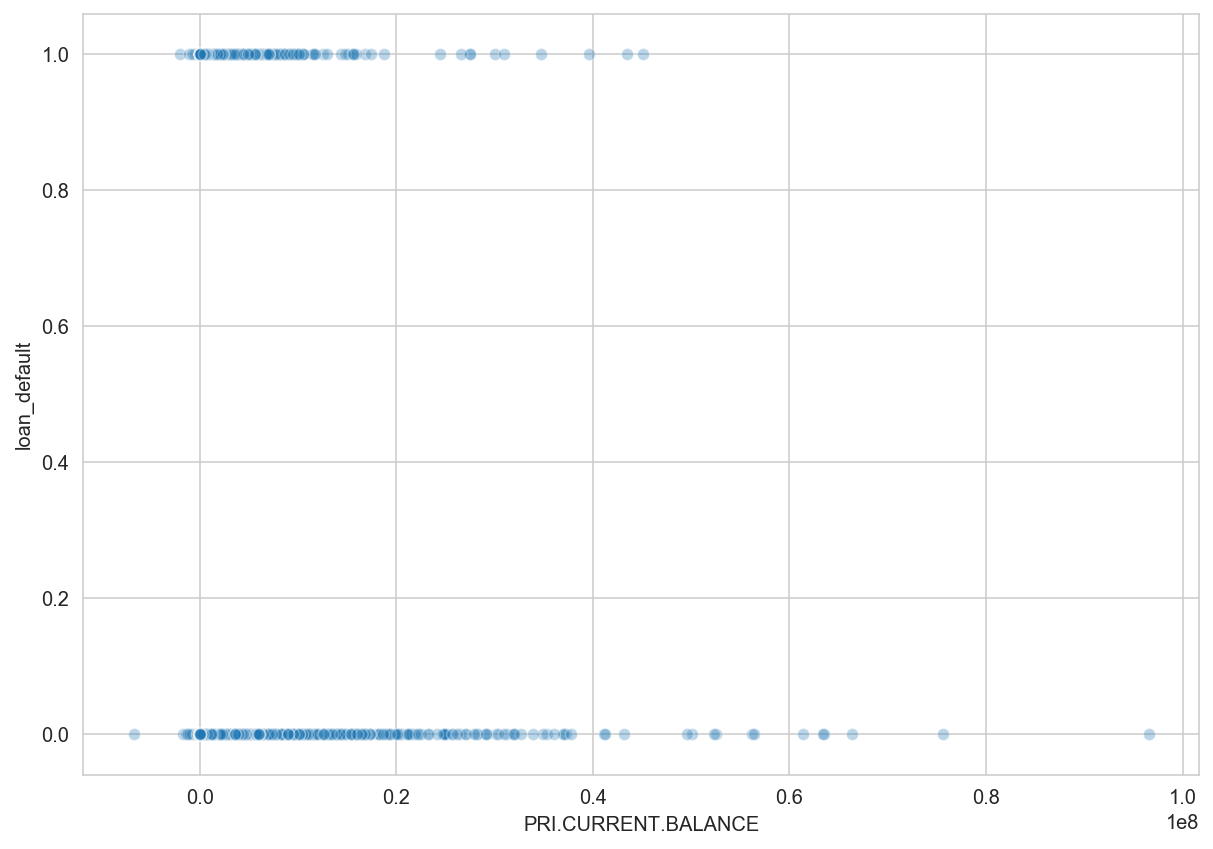

In [43]:
ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='PRI.CURRENT.BALANCE', y='loan_default', data=train_data, alpha = 0.3)


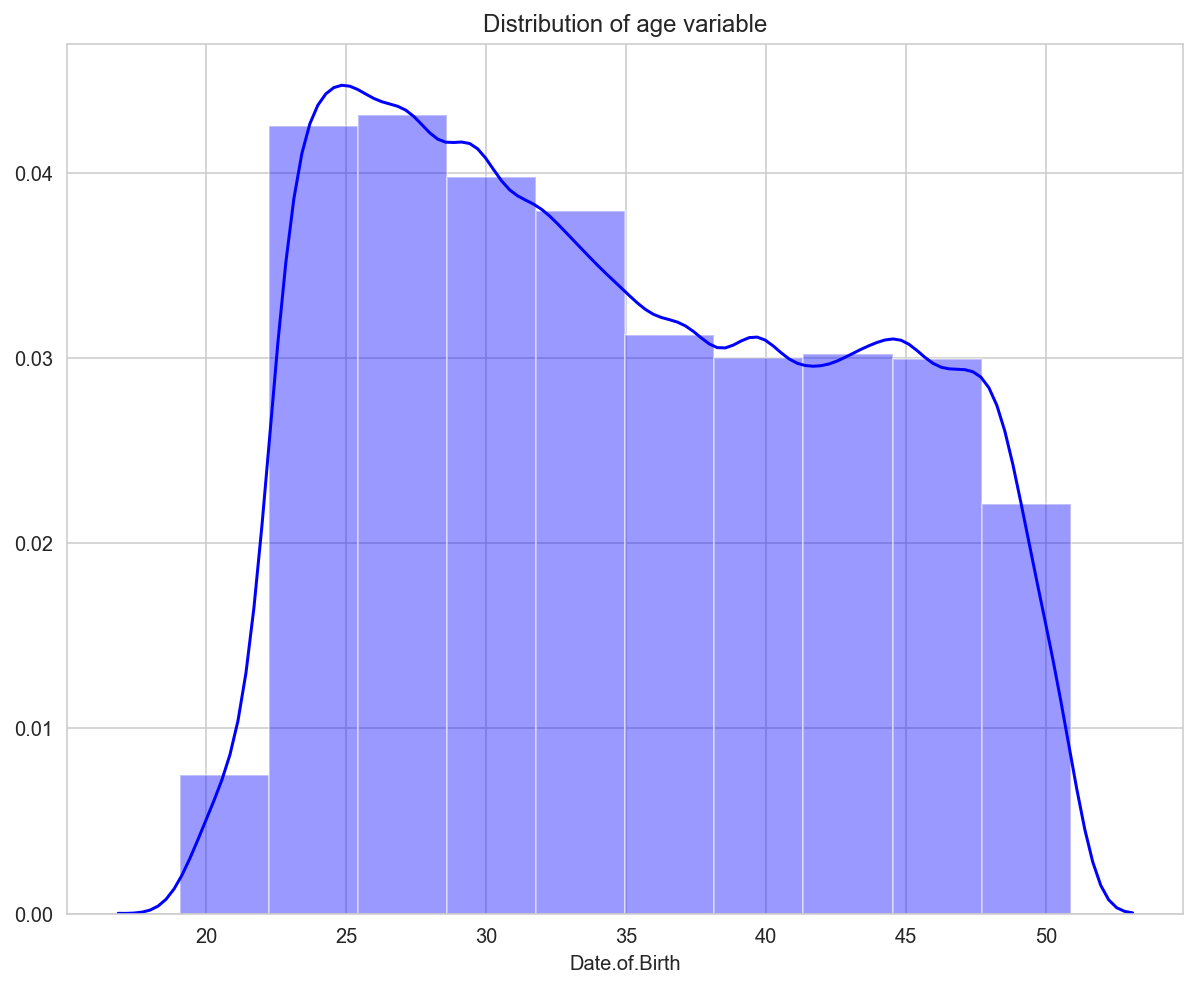

In [44]:
f, ax = plt.subplots(figsize=(10,8))
x = train_data['Date.of.Birth']
plt.xlabel('Age')
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")

plt.show()

In [45]:
train_data['Bureau_description'].value_counts()

0    129785
1     50728
2     18294
3     12412
4     12025
5      9910
Name: Bureau_description, dtype: int64

No handles with labels found to put in legend.


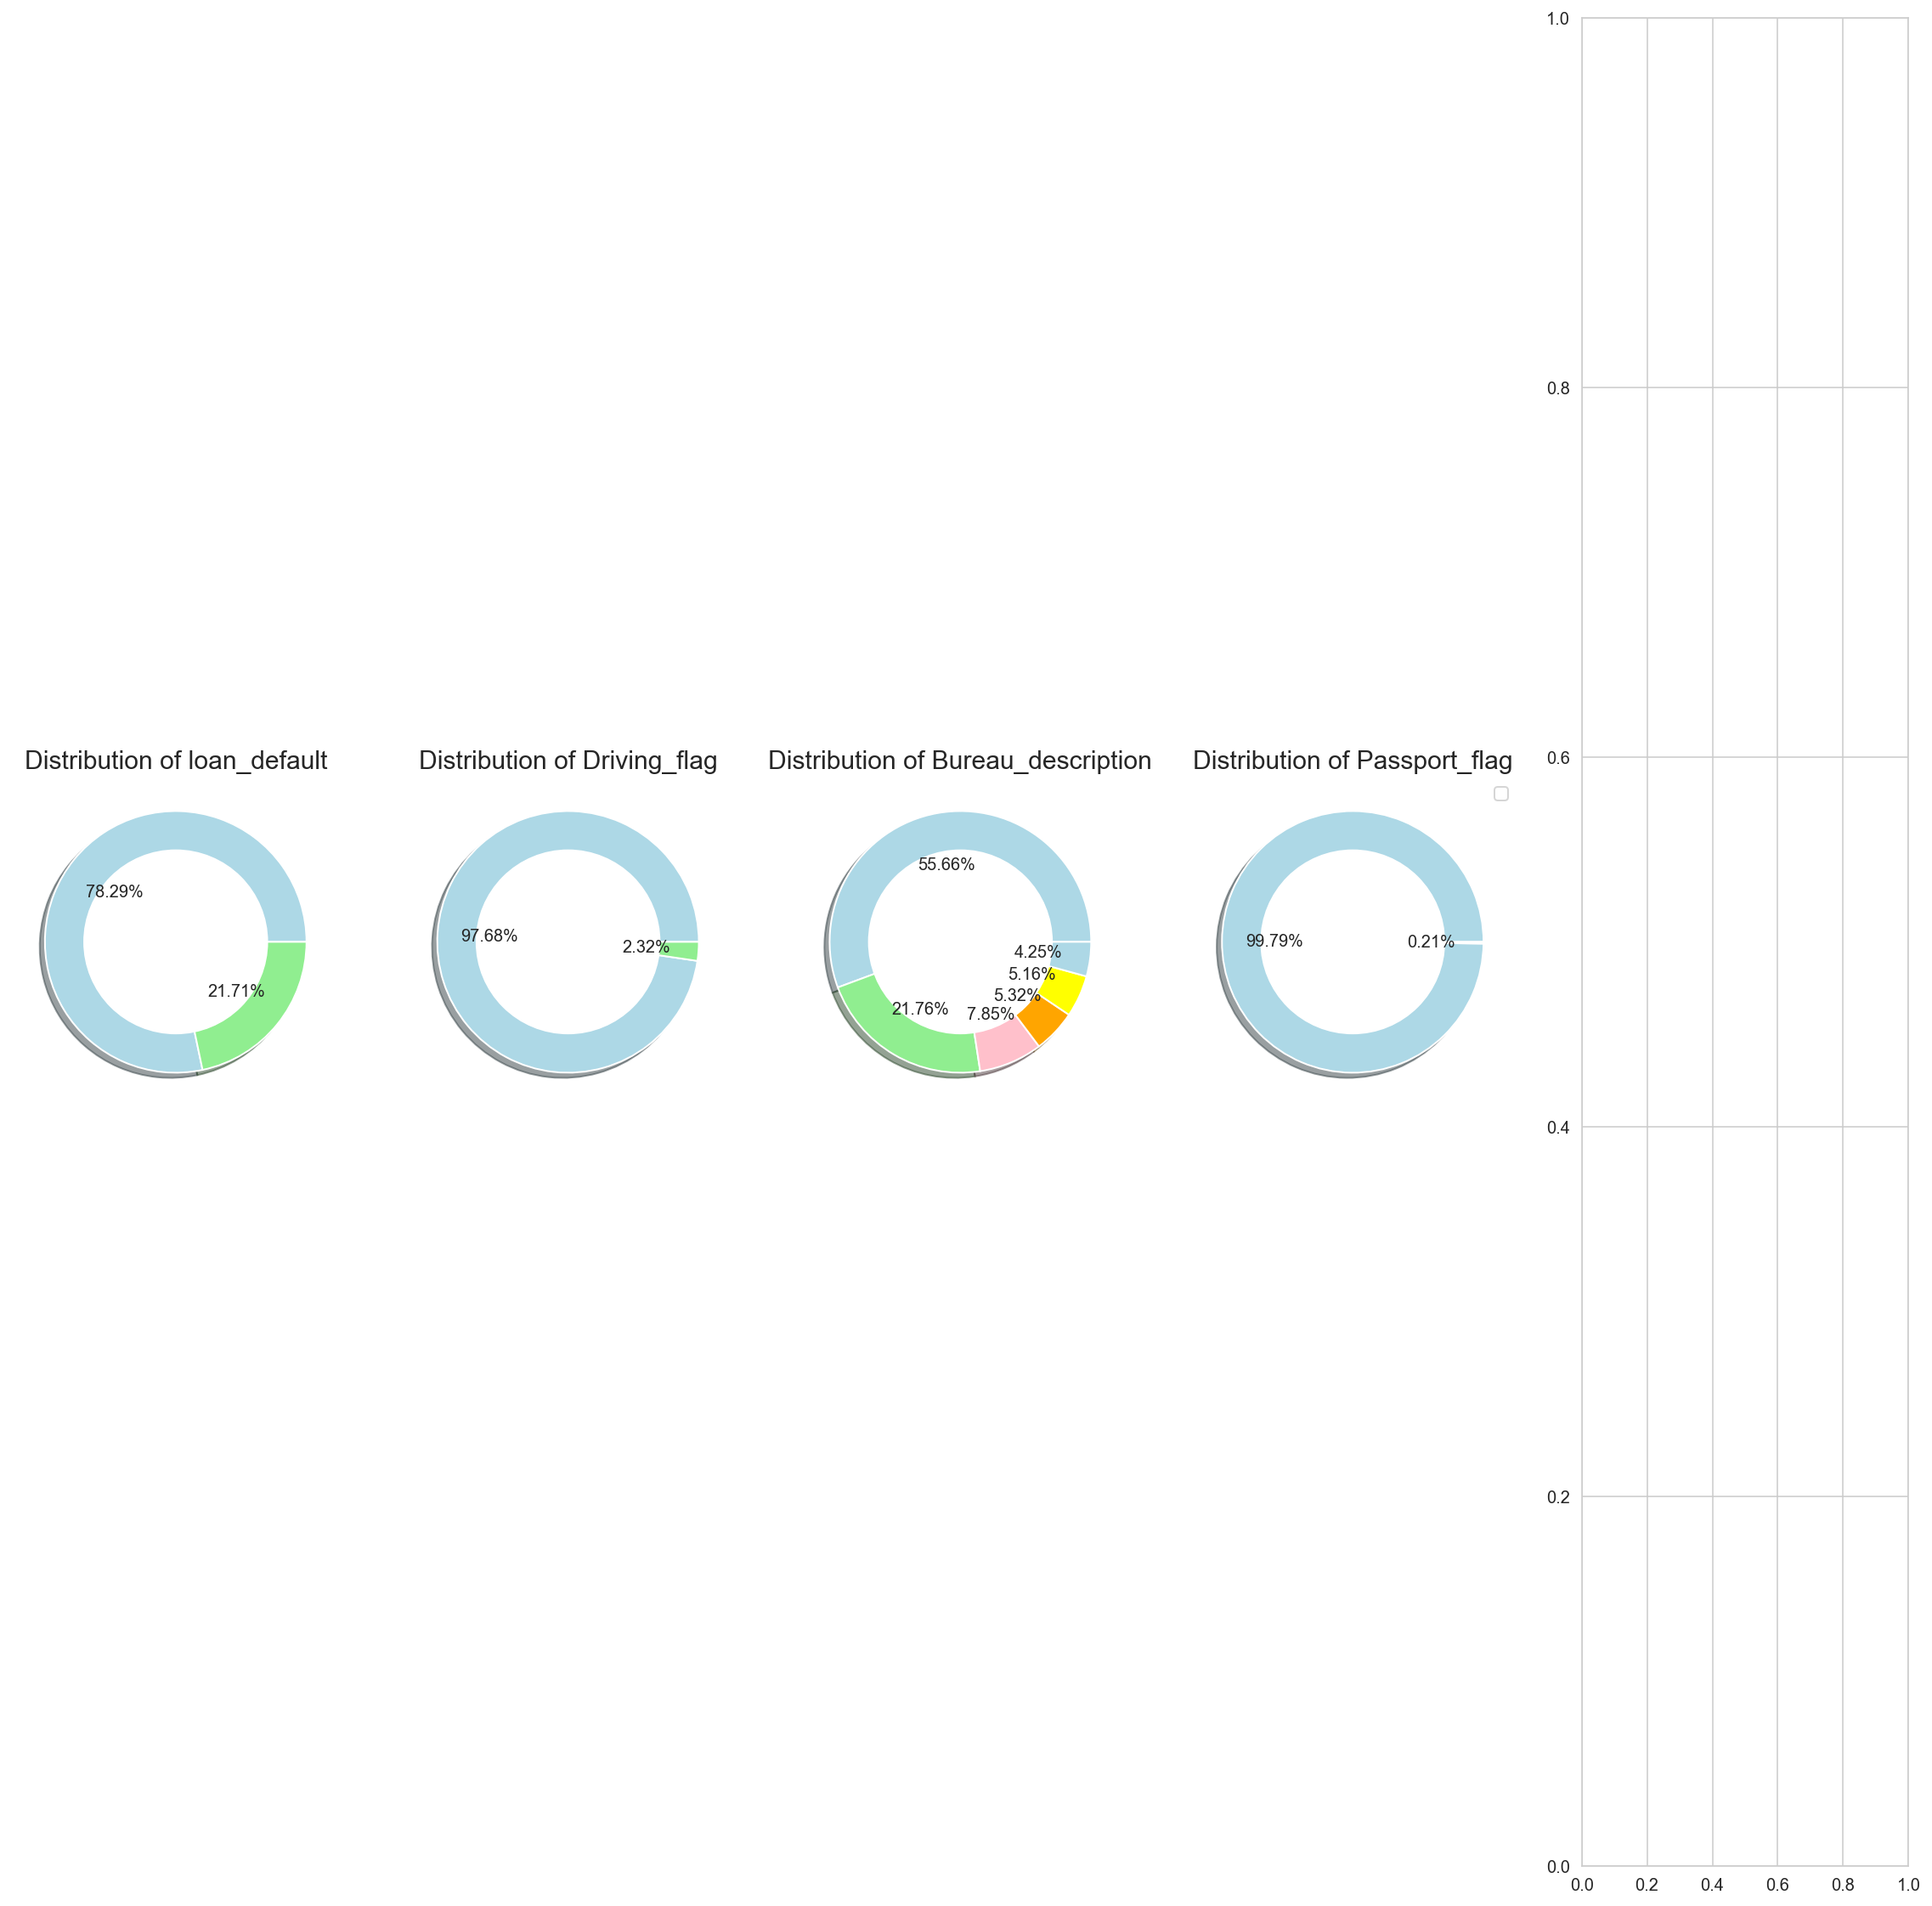

In [46]:
# plotting a donut chart for visualizing 'loan_default','Driving_flag', 'Bureau_description', 'Passport_flag'

fig, ax = plt.subplots(1,5,figsize=(20,20))
columns = ['loan_default','Driving_flag', 'Bureau_description', 'Passport_flag']

for i,column in enumerate(columns):
    plt.subplot(1,5,i+1)
    size = train_data[column].value_counts()
    colors = ['lightblue', 'lightgreen', 'pink', 'orange', 'yellow']
    

    my_circle = plt.Circle((0, 0), 0.7, color = 'white')

    plt.rcParams['figure.figsize'] = (20, 20)
    plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [47]:
dummies_Emp_t = pd.get_dummies(train_data['Employment.Type'])

In [48]:
dummies_Emp_t.head()

Salaried  Self employed  unknown
0         1              0        0
1         0              1        0
2         0              1        0
3         0              1        0
4         0              1        0

**Feature Enginnering**

By using accounts data (primary or secondary accs), let's do feature engineering

In [49]:
def features_engineering(df):
    print('new_columns')
    df.loc[:,'no_of_accts'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS']
    df.loc[:,'pri_inactive_accts'] = df['PRI.NO.OF.ACCTS'] - df['PRI.ACTIVE.ACCTS']
    df.loc[:,'sec_inactive_accts'] = df['SEC.NO.OF.ACCTS'] - df['SEC.ACTIVE.ACCTS']
    df.loc[:,'total_inactive_accts'] = df['pri_inactive_accts'] + df['sec_inactive_accts']
    df.loc[:,'total_overdue_accts'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS']
    df.loc[:,'total_current_balance'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']
    df.loc[:,'total_sanctioned_amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']
    df.loc[:,'total_disbursed_amount'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']
    df.loc[:,'total_installment'] = df['PRIMARY.INSTAL.AMT'] + df['SEC.INSTAL.AMT']
    df['number_of_0'] = (df == 0).astype(int).sum(axis=1)
    df.loc[:, 'loan_to_asset_ratio'] = df['disbursed_amount'] /df['asset_cost']
    df.loc[:,'pri_tenure'] = (df['PRI.DISBURSED.AMOUNT']/( df['PRIMARY.INSTAL.AMT']+1)).astype(int)
    df.loc[:,'sec_tenure'] = (df['SEC.DISBURSED.AMOUNT']/(df['SEC.INSTAL.AMT']+1)).astype(int)
    df.loc[:,'disburse_to_sactioned_ratio'] =  np.round((df['total_disbursed_amount']+1)/(1+df['total_sanctioned_amount']),2)
    df.loc[:,'active_to_inactive_act_ratio'] =  np.round((df['no_of_accts']+1)/(1+df['total_inactive_accts']),2)
    df.loc[:,'bal_disburse_ratio'] = np.round((1+df['total_disbursed_amount'])/(1+df['total_current_balance']),2)
    print('done')
    return df


In [50]:
features_engineering(train_data);

new_columns
done


In [51]:
train_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'Bureau_description',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'average_act_age_in_months',
       'credit_history_length_in_months', 'no_of_accts', 'pri_inactive_accts',
       'sec_inactive_accts', 'total_inactive_accts', 'total_overdue_acct

In [52]:
features_subset = train_data[['disbursed_amount', 'asset_cost', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate',
                             'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
                             'Passport_flag', 'PERFORM_CNS.SCORE', 'Bureau_description',
                             'PRI.DISBURSED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
                             'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                             'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
                             'loan_default', 'average_act_age_in_months',
                             'credit_history_length_in_months', 'no_of_accts', 'pri_inactive_accts',
                             'sec_inactive_accts', 'total_inactive_accts', 'total_overdue_accts',
                             'total_current_balance', 'total_sanctioned_amount',
                             'total_disbursed_amount', 'total_installment',
                             'loan_to_asset_ratio', 'pri_tenure', 'sec_tenure']]
    

In [53]:
X_subset = pd.concat([features_subset, dummies_Emp_t], axis=1).drop('Employment.Type', axis=1)


In [54]:
X_subset.to_csv('X_subset.csv', index=False)

In [55]:
X_subset.shape


(233154, 36)